PREDICTING HOUSE PRICES USING LINEAR REGRESSION


NAME: BRIAN KIGEN


BUSINNESS UNDERSTANDING


Stake holder: Emarld City Realators

Business problem: Emarld City Realators need to provide prospective home seller with guidance improve the values of their homes through using machine learning to estimate the sale  of their properties.

Problem Statement: I will use house data set from King House Sales dataset to build a linear regression model that best predict sales  price  for properties.

DATA UNDERSTANDING

The project uses the king County House Sales dataset.The data set include all data of home sales from 2014 to 2015.
The data  can be found kc_house_data.csv in the folder along with descritpion of feature found in  column_names.md
The original data include sale data for 21,597homes with 20 different features which includes

date - Date house was sold.

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

view - Quality of view from house

condition - How good the overall condition of the house is. Related to maintenance of house

grade - Overall grade of the house. Related to the construction and design of the house

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service



DATA PREPARATION

Data cleaning

imports

In [130]:
#importing libraries and packages
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [131]:
# importing data set
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [132]:
# view information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above we can see that waterfront and year renovated have missing values because the total number of rows 21597.

In [133]:
# check the shape of the data
df.shape

(21597, 21)

In [134]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


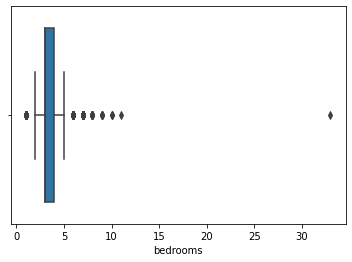

In [135]:
#checking outliers in bedroom column
sns.boxplot(x='bedrooms',data=df);

In [136]:
# Drop rows that contain any value in the list

df = df[(df.bedrooms != 33)]

In [137]:
def boxplot(df,column):
    sns.boxplot(x=column,data=df);
    

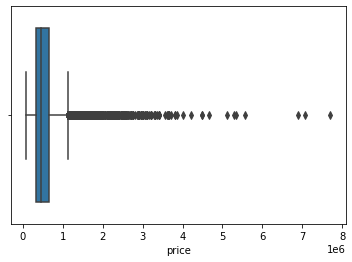

In [138]:
boxplot(df,'price')

DATA PROCESSING

To start with  we will drop columns that will not be usefull in our project.we will iignore some of thhe following features from our data set:
date
view
yr_renovated
zipcode
lat
long


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

Cleaning functions.

This functions will be used  to clean our data

In [140]:
#Cheicking missing value
def look_nulls(df):
    missing_list =[]
    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)
    return missing_list

In [141]:
#number of missing values in dataset
def show_no_sum(df,column):
    return df[column].isna().sum()

In [142]:
# filling missing values with values
def fill_na(df,column,value):
    df[column]= df[column].fillna(value)

Looking fo NAN values and missing values

In [143]:
# looking of  nulls values  in dataset
look_nulls(df)

['waterfront', 'view', 'yr_renovated']

In [144]:
# number of missing values in the waterfront column
show_no_sum(df,['waterfront'])

waterfront    2376
dtype: int64

In [145]:
# Replace the Non  NAN value with 0
fill_na(df,['waterfront'],0)


In [146]:
# Replace the Non  NAN value with 0
fill_na(df,['yr_renovated'],0)


In [147]:
# Recheck if there is any missing column
look_nulls(df)

['view']

In [148]:
df['sqft_basement'].value_counts()
# Missing data represented by '?' - 454 observations missing data


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3260.0        1
274.0         1
2190.0        1
2300.0        1
1960.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [149]:
#look at the  percentage account to the values
df.sqft_basement.value_counts(normalize = True)




0.0       0.593906
?         0.021022
600.0     0.010048
500.0     0.009678
700.0     0.009631
            ...   
3260.0    0.000046
274.0     0.000046
2190.0    0.000046
2300.0    0.000046
1960.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [150]:
df['sqft_basement'].replace('?', 0.0, inplace = True) # replace the ? with 0 bbecause  it account 60%
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int) # convert into integer

In [151]:
# Summary statistics
df.describe()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21533.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233874,3.409752,7.657946,1788.631506,285.702954,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.765702,0.650471,1.173218,827.763251,439.825454,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


the avarage  price  of house 5.4 million dollars.

The maximmum price of  house 7.7 million dollars.

we can see outlier in bedrooms column is 33 bedrooms




Exploratory Data Analysis

UNIVARIATE ANALYSIS

Checking for outliers in our dataset

In [152]:
#Create fuunctions for box plot
def boxplot(df,column):
    sns.boxplot(x=column,data=df);

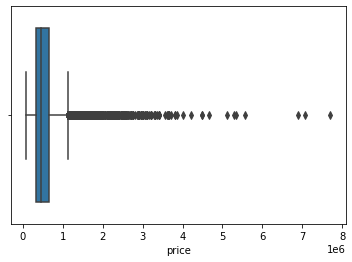

In [153]:
#outliers in prices
boxplot(df,'price')


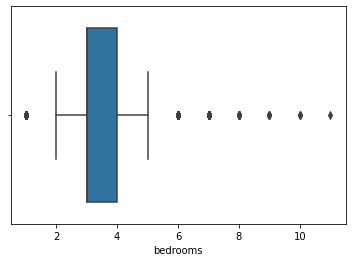

In [154]:
boxplot(df,'bedrooms')

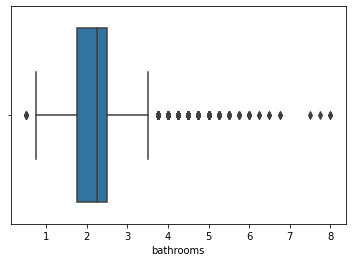

In [155]:
boxplot(df,'bathrooms')

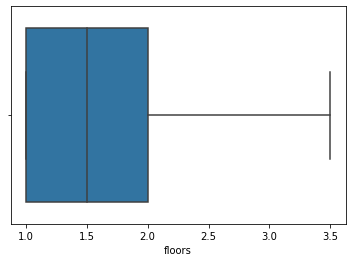

In [156]:
boxplot(df,'floors')



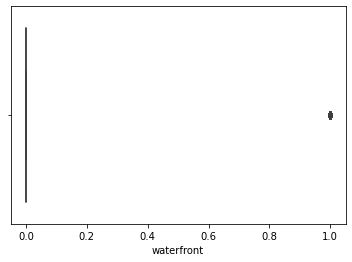

In [157]:
boxplot(df,'waterfront')


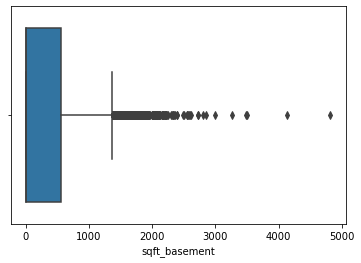

In [158]:
boxplot(df,'sqft_basement')


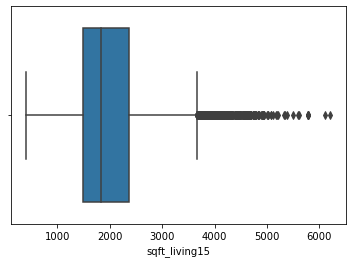

In [159]:
boxplot(df,'sqft_living15')


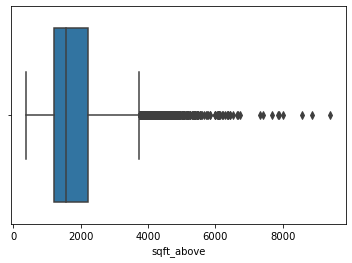

In [160]:
boxplot(df,'sqft_above')


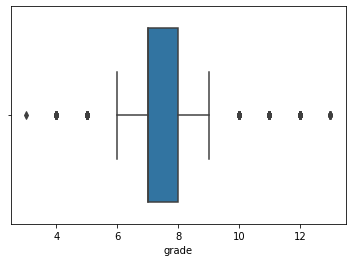

In [161]:
boxplot(df,'grade')


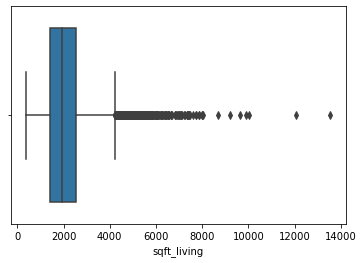

In [162]:
boxplot(df,'sqft_living')

Look   distribution of Price through Histogram


In [163]:
# First create a function  for plotting histogram
def create_hist(feature, num_bins, title, x_label, y_label, color='blue',plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

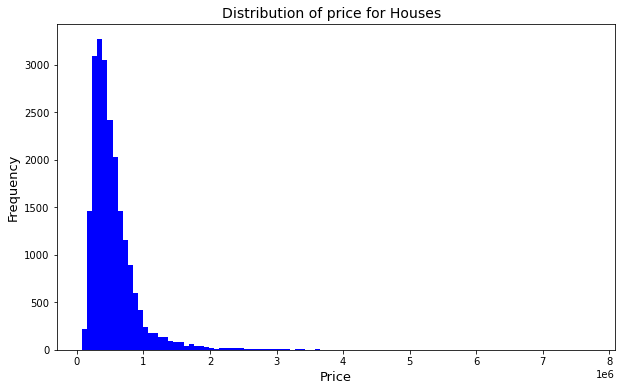

In [164]:
create_hist(df['price'], 
            num_bins = 100, 
            title = 'Distribution of price for Houses  ',
           x_label = 'Price',
           y_label = 'Frequency')

In [165]:
kdf = df.query('price < price.quantile(.95)')
kdf


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


We can see above the distribution target is normaly distributed..it is right skewed . I will use log transformation to make the target well distributed in my linear regression model.

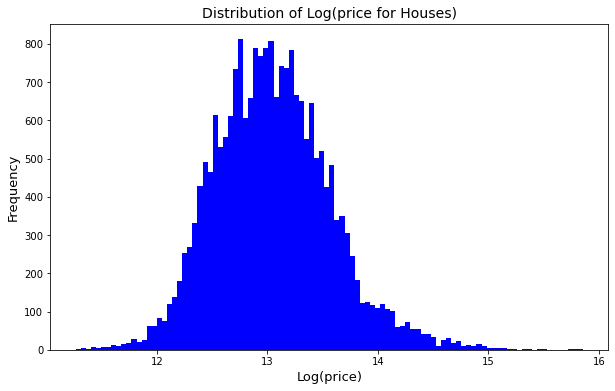

In [166]:
# Using log transformation to make it normalized data
create_hist(np.log(df['price']), 
            num_bins = 100, 
            title = 'Distribution of Log(price for Houses)',
           x_label = 'Log(price)',
           y_label = 'Frequency')

In [167]:
# Calculate natural logarithm on  'price' column 
#df['price'] = np.log(df['price']) 
#df # Show the dataframe

logging the data helps in making the data normaly distributed.

Categorical Data

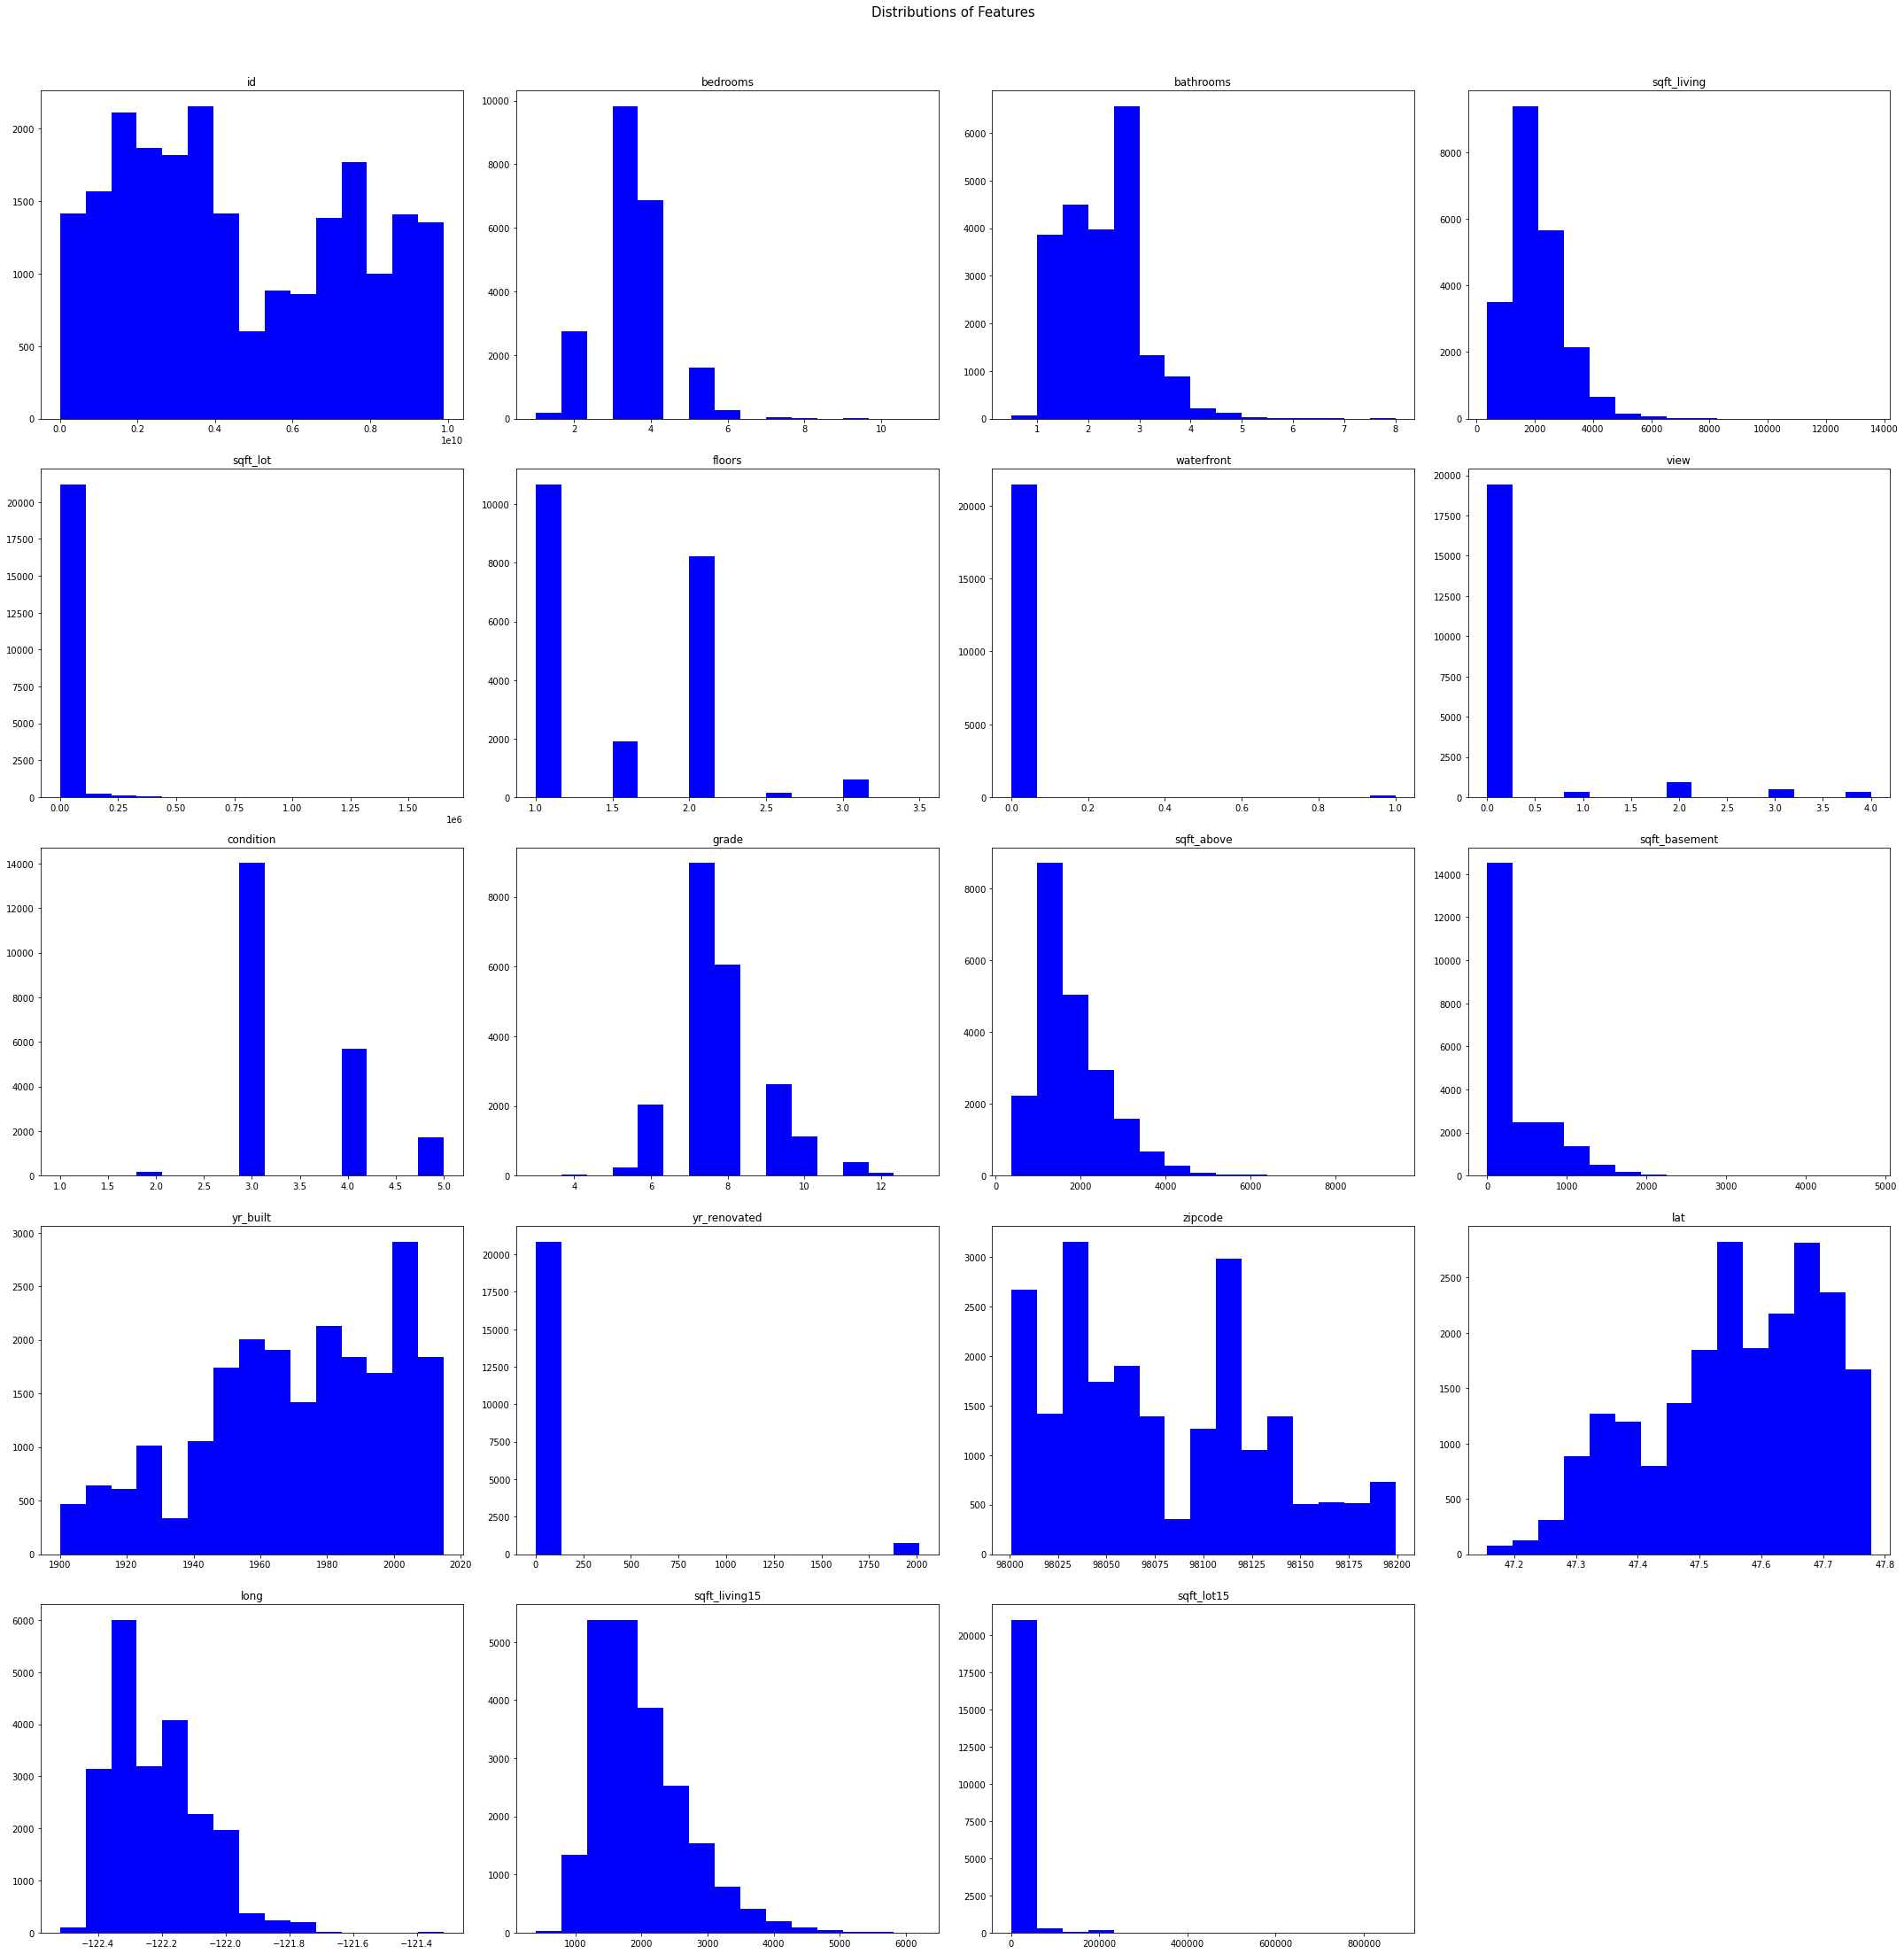

In [168]:
df.drop(columns='price').hist(figsize=(30, 30), bins = 15, grid = False, color = 'blue')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout()

I have  visualized feauture which will  be used in my anlyisis.As we can see from the above  cells majority of the categorical features are not normally distributed. 

BIVARIATE ANALYSIS

IndexError: index 4 is out of bounds for axis 0 with size 4

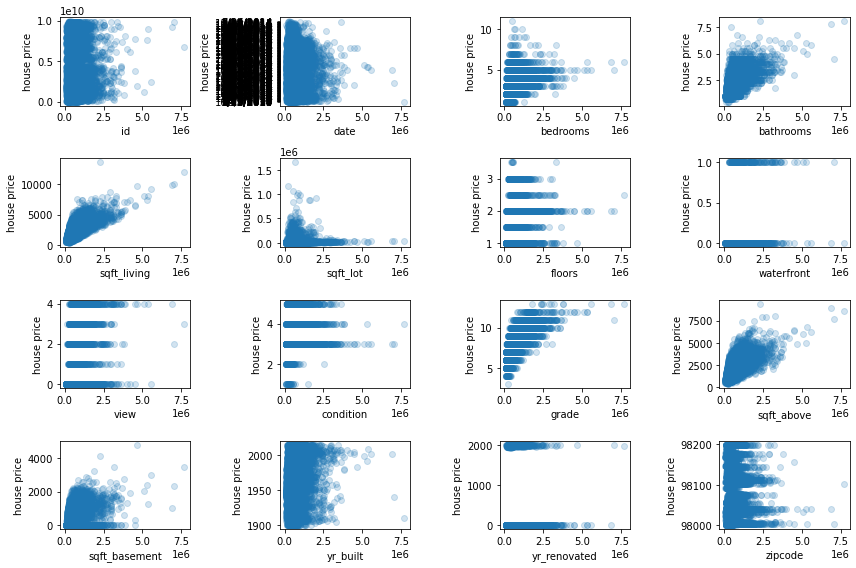

In [169]:
#look at the correlation between the categorical features  and the target (price of house)
scatterplot_data = df.drop("price", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(df['price'], df[col], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("house price")

we can see linear relationship between the categorical data with target feature(house price)

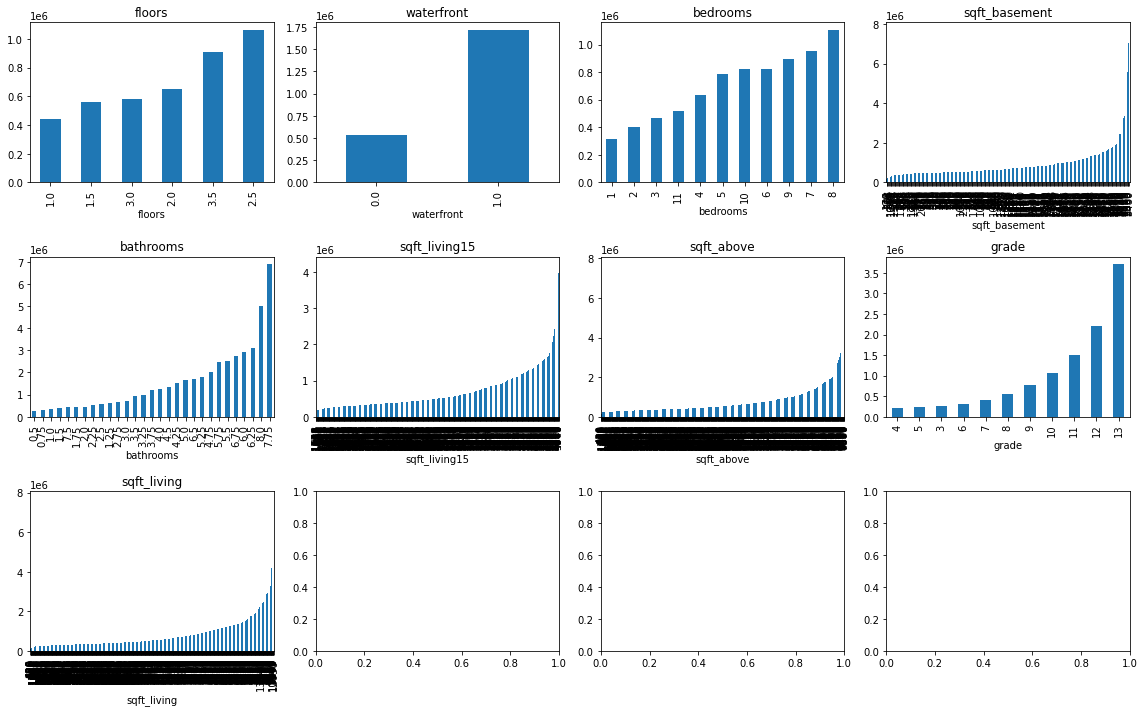

In [ ]:

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16,10))

categoricals = ['floors','waterfront','bedrooms','sqft_basement','bathrooms','sqft_living15','sqft_above','grade','sqft_living']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax = ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

we have plot prices of the house against the categorical data.

In [170]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [171]:

#Create two new columns for year and the months
df['year']= df['date'].apply(lambda x : x.year)
df['month']= df['date'].apply(lambda x : x.month)


In [172]:
# Create our dummy variables for the categorical features

cond_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(df['grade'], prefix = 'grade', drop_first = True)


In [173]:
cond_dummies.nunique()

cond_2    2
cond_3    2
cond_4    2
cond_5    2
dtype: int64

In [174]:
grade_dummies.nunique()


grade_4     2
grade_5     2
grade_6     2
grade_7     2
grade_8     2
grade_9     2
grade_10    2
grade_11    2
grade_12    2
grade_13    2
dtype: int64

In [175]:
# Drop the original column and concatenate our dummy variable columns with our original dataframe

df = df.drop(['condition', 'grade'], axis = 1)
df_clean = pd.concat([df, cond_dummies, grade_dummies], axis = 1)


In [176]:
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='month'>

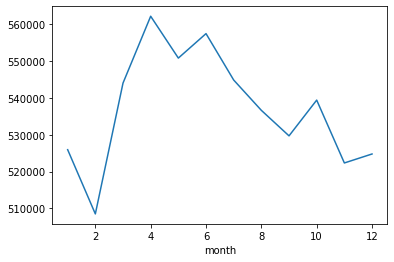

In [177]:
#plot graph of avarage price of house over the month
df.groupby('month').mean()['price'].plot()

From the line graph above we can see that the highest avarage price of the 560000 dollar which was sold on April while the lowest
is 510000 dollars wchich sold on february.From the graph abbbove we cans see the price  are fluctuating rising and falling over period of time.

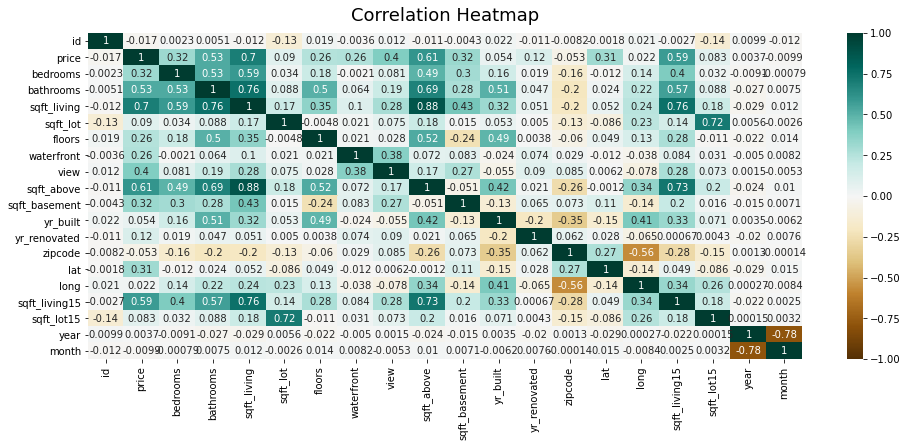

In [178]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

 Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

 High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

 Low degree: When the value lies below + .29, then it is said to be a small correlation.

 No correlation: When the value is zero.

From the heat mape we can see colinearity of variable agaisnt each other.


In [179]:
# show the relationship between categorical features with the target 
corr_matrix = df.corr()[[ 'price']].sort_values('price')
corr_matrix


,price
zipcode,-0.053409
id,-0.016763
month,-0.009926
year,0.003736
long,0.022047
yr_built,0.053965
sqft_lot15,0.082849
sqft_lot,0.089879
yr_renovated,0.117858
floors,0.256820


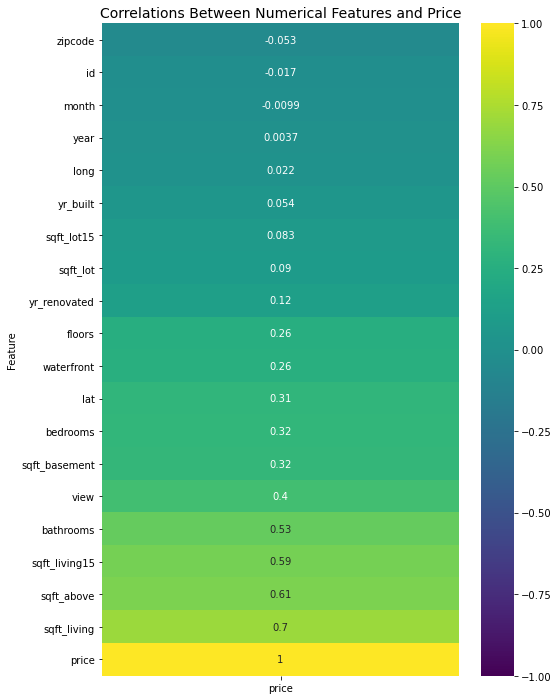

In [180]:
#Heat map to show correlation of numerical features with price
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

We have created a heatmap to show the realtionship between the target price and the categorical data.
From the plot above we can see that square fit living has the hihgest correllation  and the lowest correlation iis condition .

In [181]:
#Take only features that have correlation coefficient of o.25
corr_target = abs(corr_matrix)
target_num_features = corr_target.loc[corr_target['price'] >= 0.25, :]
target_num_features

,price
floors,0.256820
waterfront,0.264308
lat,0.306687
bedrooms,0.315961
sqft_basement,0.321103
view,0.395739
bathrooms,0.525915
sqft_living15,0.585267
sqft_above,0.605392
sqft_living,0.701929


I have picked categorical feature above o.25 which I will be able to usee in order to build my model

Modelling

In [182]:
def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Display a the summary output of a linear regression model, with predictors X and target y.

    Also displays a QQ plot and residual plot by default. These can be toggled off.
    
    The function will add a constant to the predictors by default, and this can be toggled off.
    """
    # Run a linear regression and display the summary
    if add_constant:
        X_sm = sm.add_constant(X, has_constant='add')
    else:
        X_sm = X
    model = sm.OLS(y, X_sm).fit()
    display(model.summary())

    # Display a QQ plot
    if qq:
        fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
        fig_qq.suptitle('QQ plot for residual normality check')
    else:
        pass

    # Display a plot of predicted values vs. residuals
    if sced:    
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10,5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2)
        ax.plot(preds, [0 for i in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value");
    else:
        pass
    lr = LinearRegression()
    lr.fit(X_sm, y)
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model Mean Absolute Error: {metrics.mean_absolute_error(y, lr.predict(X_sm))}')

In [183]:
#check the columns we have
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [184]:
# dropping id,zip code, and date columns
df.drop(["date", "year","yr_built",  
                  'yr_renovated',
                  "month"], axis = 1, inplace = True)

Text(0.5, 1.02, 'Histograms of numerical features')

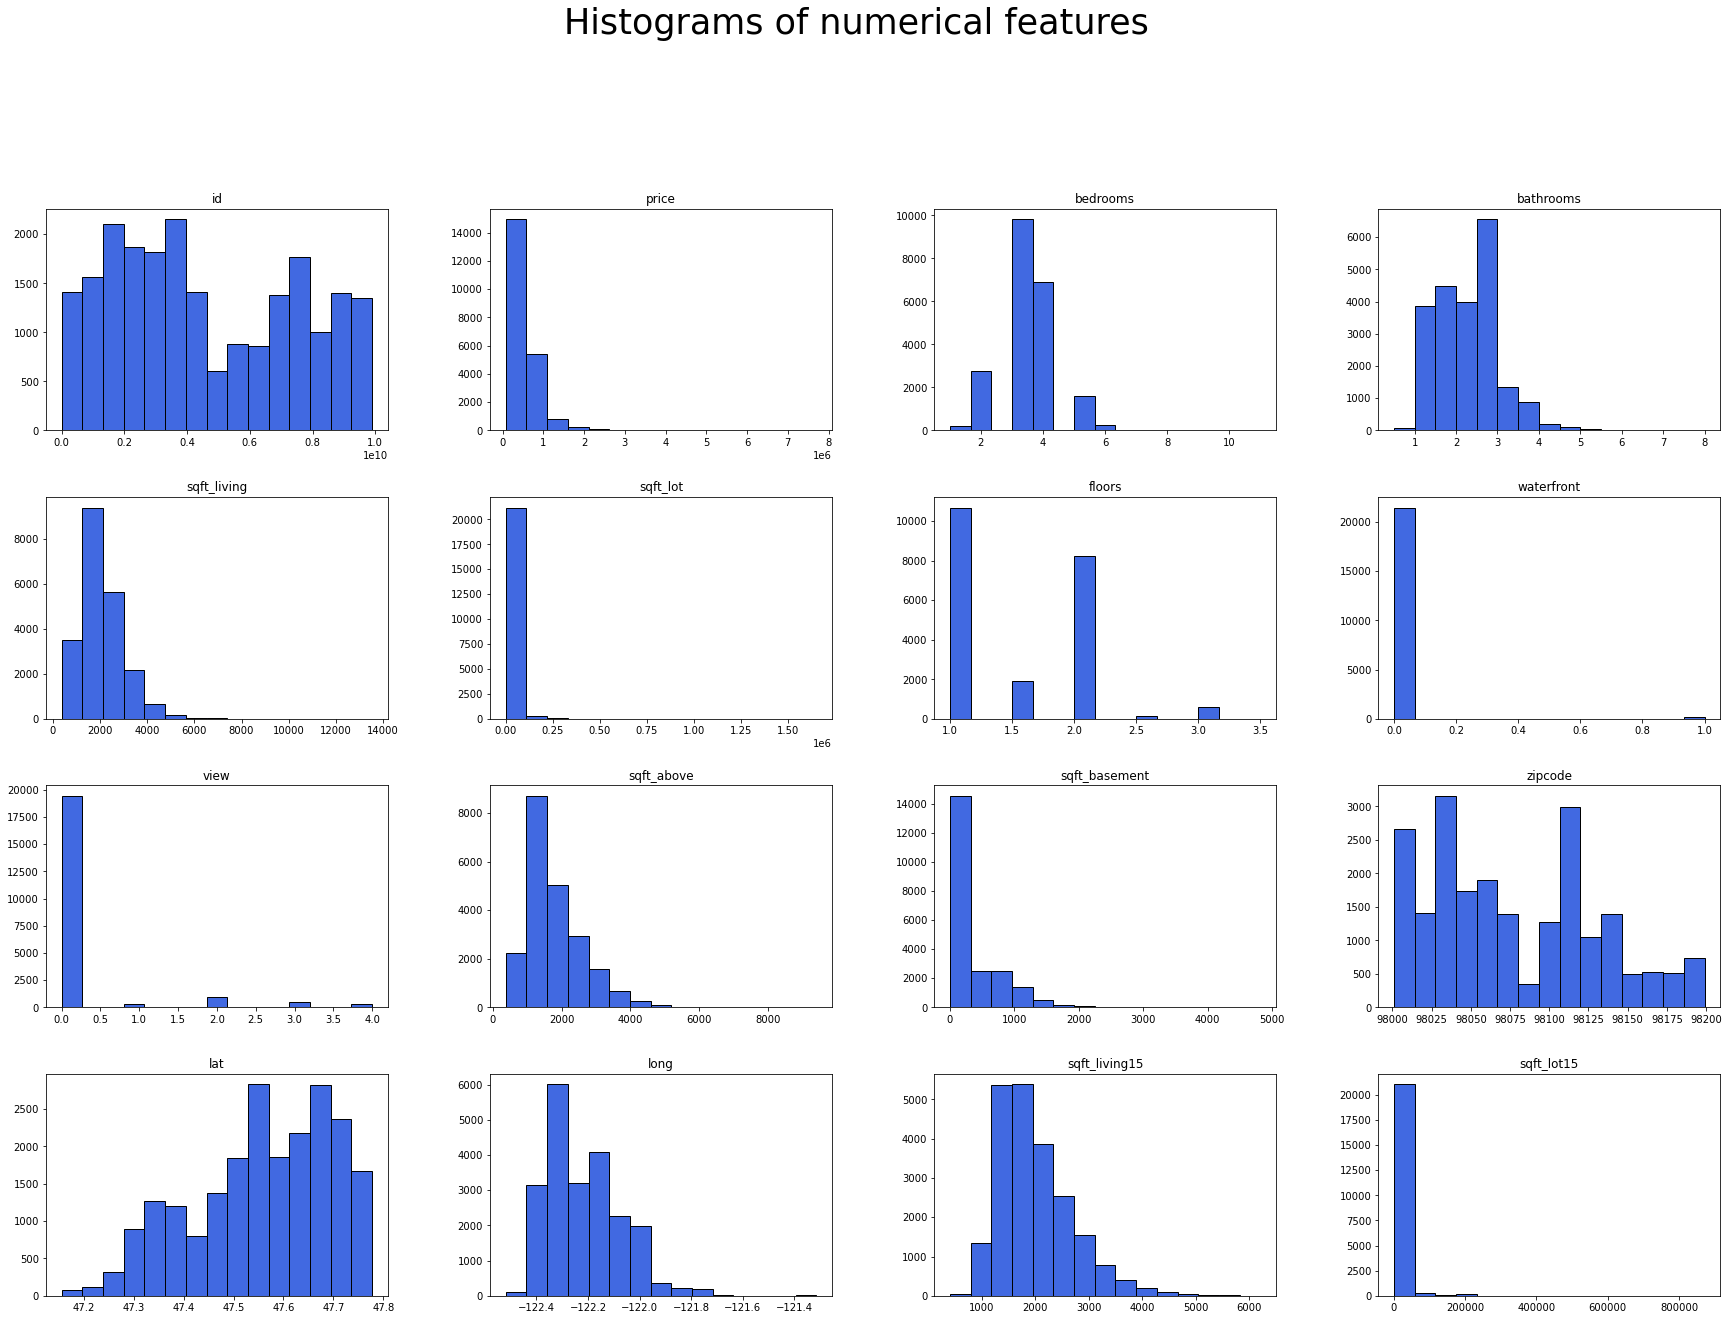

In [185]:
df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 35)

Model 1

Normalization of Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.285e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:53:46   Log-Likelihood:            -2.7426e+05
No. Observations:               20438   AIC:                         5.485e+05
Df Residuals:                   20436   BIC:                         5.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.471e+05   3122.123     47.117      0.000    1.41e+05    1.53e+05
sqft_living   166.8627      1.472    113.377      0.000     163.978     169.747
==============================================================================
Omnibus:                      917.400   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.345
Skew:                           0.543   Prob(JB):                    1.67e-227
Kurtosis:                       3.215   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.38609854686213974
Model Mean Absolute Error: 131096.30854682936


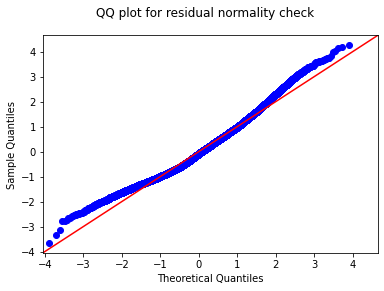

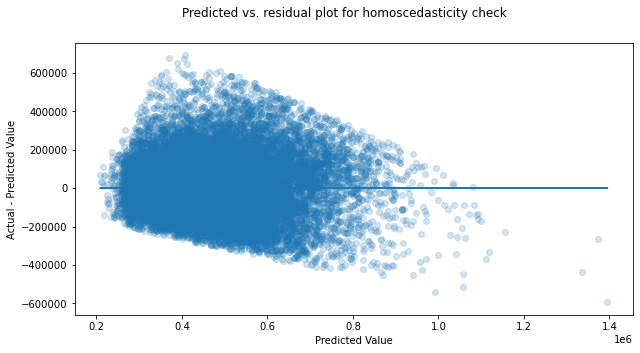

In [246]:
#df_clean['sqft_living'] = np.log(df_clean['sqft_living']) 
y = df['price']
X_baseline = df['sqft_living']


# Run the model
reg_qq_sced(y, X_baseline)

Regression Resulst

Findings

From the model above we can see that R-squaredvalue is38%

the Mean Absolute Error (MAE) is a model performance metric that reflects the mean of the absolute values of the individual prediction errors on over all instances in the model. We're using this performance metric throughout this analysis because its value is directly reportable to our clients in clearly conveying business use.

In this model, the MAE is 131096 which is very high

We need to check homoscedasticity, which indicates whether a dependent variable's variability is equal across values of the independent variable. Given our plot above this model does not meet the homoscedasticity assumption.

We can see from the Q-Q plot above that our redisuals is not  normally distributed and its Durbin-Watson score is 1.964 (which is well within the accepted range of 1.5 to 2.5. Thus, this model meets the normality assumption.

Model with eleected home features

What features of their home seller  change or improve  increasse their value of their home abd by how much?

In this model will add more feature to improve our metrics in our models  and by how much

Predictors:

Bedrooms

Bathrooms

sqft_living

Floor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3043.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:55:52   Log-Likelihood:            -2.7447e+05
No. Observations:               20438   AIC:                         5.490e+05
Df Residuals:                   20433   BIC:                         5.490e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.014e+06   3.06e+04    -65.845      0.000   -2.07e+06   -1.95e+06
bedrooms    -2.918e+04   1696.594    -17.197      0.000   -3.25e+04   -2.59e+04
bathrooms    3814.1340   2600.258      1.467      0.142   -1282.580    8910.848
sqft_living  3.387e+05   4754.664     71.228      0.000    3.29e+05    3.48e+05
floors       2.447e+04   2500.638      9.785      0.000    1.96e+04    2.94e+04
==============================================================================
Omnibus:                      842.689   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.018
Skew:                           0.528   Prob(JB):                    3.08e-207
Kurtosis:                       3.035   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model adjusted R-squared: 0.37319610345890697
Model Mean Absolute Error: 132861.90105423113


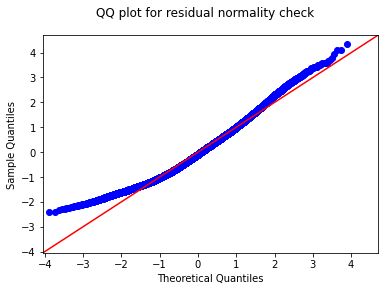

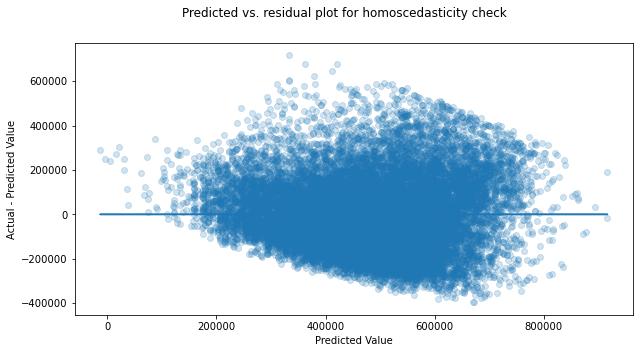

In [249]:
# create a new model wiith additional features
x=df_clean[[  'bedrooms', 'bathrooms', 'sqft_living',
        'floors']]
y=df_clean['price']
#Run the model
reg_qq_sced(y,x)

Regression finding with Quantative feautes of home

R_squared values is 39% 

The MAE is 1328621 which is slighthigh to our bbaseline model.

Normality

we can see from our Q_Q plot and Durbin_Watson that our model pass meets the  normmality assumption

In [250]:
# Run Goldfeld Quandt test to further confirm homoscedasticity
name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(y, x)
list(zip(name, test))

[('F statistic', 0.9895200942296457), ('p-value', 0.7027681097235672)]

Since bathrooms does not seem to have a statistically significant linear relationship with sale price, let's drop this feature from this model to see how the metrics are affected. Further, let's remove the top 5% of price outliers in our dataframe.

lets create a new model without bedroom column

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     4366.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:56:15   Log-Likelihood:            -2.7419e+05
No. Observations:               20438   AIC:                         5.484e+05
Df Residuals:                   20434   BIC:                         5.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.22e+05   3955.003     30.837      0.000    1.14e+05     1.3e+05
bathrooms   -6021.8815   2493.243     -2.415      0.016   -1.09e+04   -1134.926
sqft_living   163.8797      2.104     77.894      0.000     159.756     168.003
floors       2.941e+04   2447.413     12.016      0.000    2.46e+04    3.42e+04
==============================================================================
Omnibus:                      955.835   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.223
Skew:                           0.554   Prob(JB):                    2.47e-238
Kurtosis:                       3.238   Cond. No.                     7.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.3905354500121673
Model Mean Absolute Error: 130375.78667634685


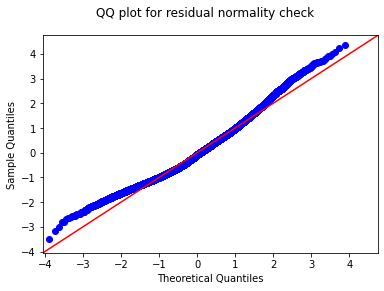

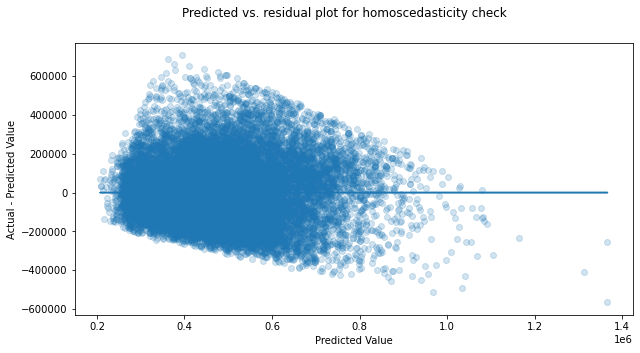

In [251]:
x_quantitave=df[['bathrooms','sqft_living','floors']]
y=df['price']
#Run the model
reg_qq_sced(y,x_quantitave)

R-squared value 49%

The MAE is slightly higher than the previous model

SECOND MODEL

What features of their home seller  change or improve  increasse their value of their home and by how much?

In our secoond model we  look at the condition of the house (age of the house ) and construction quality of the house such the quality of the material and the workmanship of the house.

We will take the following feature in our analysis

sqft_living

grade

view 

waterfront


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1731.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:56:23   Log-Likelihood:            -2.7298e+05
No. Observations:               20438   AIC:                         5.460e+05
Df Residuals:                   20427   BIC:                         5.461e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.931e+05   1.55e+05     -5.125      0.000    -1.1e+06    -4.9e+05
sqft_living  1.687e+05   3778.116     44.655      0.000    1.61e+05    1.76e+05
grade_4     -8.781e+04   1.56e+05     -0.564      0.573   -3.93e+05    2.17e+05
grade_5     -1.103e+05   1.53e+05     -0.720      0.472   -4.11e+05     1.9e+05
grade_6     -9.204e+04   1.53e+05     -0.602      0.547   -3.92e+05    2.08e+05
grade_7     -5.204e+04   1.53e+05     -0.340      0.734   -3.52e+05    2.48e+05
grade_8      2.869e+04   1.53e+05      0.188      0.851   -2.71e+05    3.29e+05
grade_9      1.446e+05   1.53e+05      0.944      0.345   -1.56e+05    4.45e+05
grade_10     2.347e+05   1.53e+05      1.532      0.125   -6.55e+04    5.35e+05
grade_11     3.296e+05   1.54e+05      2.145      0.032    2.84e+04    6.31e+05
grade_12     3.372e+05   1.68e+05      2.010      0.044    8391.288    6.66e+05
grade_13             0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1224.793   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.259
Skew:                           0.611   Prob(JB):                         0.00
Kurtosis:                       3.493   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model adjusted R-squared: 0.4583806151747579
Model Mean Absolute Error: 120999.365219894


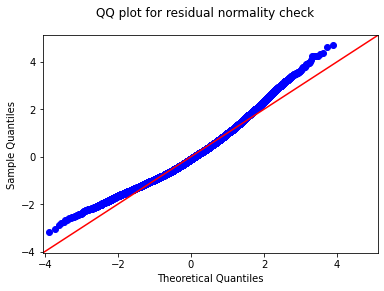

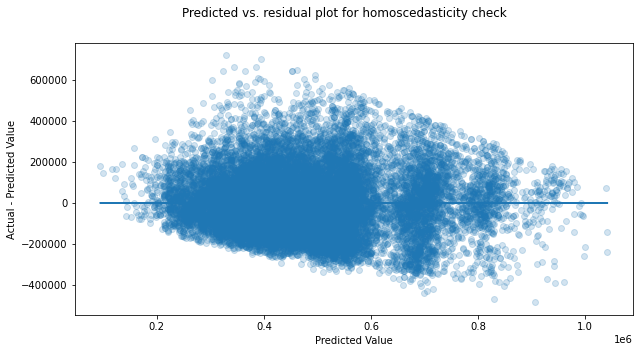

In [252]:
x_quality=df_clean[['sqft_living','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
#Run the model
reg_qq_sced(y,x_quality)

R_squared value is 45 improve from the previous model

The MEA is 120999 which is lower than the previous model

The normal  assumption is  achived from the Q-Q plot where  and the D_W score is 1.965

Based on the plot above it  pass the homescediacity assumption

In [256]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, x_quality)
list(zip(name, test))

[('F statistic', 0.9545263076161983), ('p-value', 0.9906392759080601)]

Model 3

This model looks at alll feautures 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1306.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:56:36   Log-Likelihood:            -2.7272e+05
No. Observations:               20438   AIC:                         5.455e+05
Df Residuals:                   20423   BIC:                         5.456e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.109e+06   1.55e+05     -7.141      0.000   -1.41e+06   -8.05e+05
sqft_living    2.132e+05   6056.454     35.204      0.000    2.01e+05    2.25e+05
sqft_above      -54.9352      3.242    -16.945      0.000     -61.290     -48.581
bathrooms     -1.605e+04   2408.766     -6.663      0.000   -2.08e+04   -1.13e+04
floors         1.458e+04   2680.932      5.438      0.000    9323.061    1.98e+04
sqft_living15    47.6869      2.797     17.047      0.000      42.204      53.170
grade_4       -9.437e+04   1.54e+05     -0.614      0.539   -3.96e+05    2.07e+05
grade_5       -1.099e+05   1.51e+05     -0.726      0.468   -4.07e+05    1.87e+05
grade_6       -9.259e+04   1.51e+05     -0.613      0.540   -3.89e+05    2.04e+05
grade_7       -5.686e+04   1.51e+05     -0.376      0.707   -3.53e+05    2.39e+05
grade_8        2.215e+04   1.51e+05      0.147      0.883   -2.74e+05    3.18e+05
grade_9        1.404e+05   1.51e+05      0.929      0.353   -1.56e+05    4.37e+05
grade_10       2.341e+05   1.51e+05      1.547      0.122   -6.24e+04    5.31e+05
grade_11        3.37e+05   1.52e+05      2.221      0.026    3.95e+04    6.34e+05
grade_12       3.846e+05   1.66e+05      2.321      0.020    5.98e+04    7.09e+05
grade_13               0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1110.109   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.017
Skew:                           0.576   Prob(JB):                    5.13e-288
Kurtosis:                       3.474   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model adjusted R-squared: 0.47192714789193824
Model Mean Absolute Error: 119321.1768095253


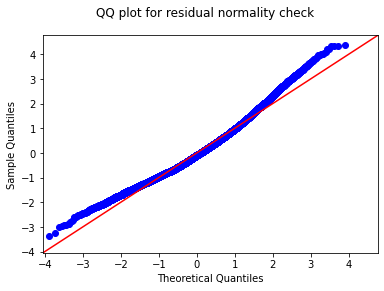

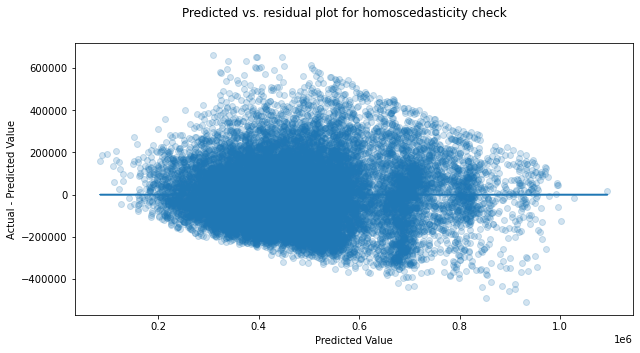

In [254]:
x_quality3=df_clean[['sqft_living','sqft_above','bathrooms','floors','sqft_living15','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
reg_qq_sced(y,x_quality3)

The R_squared above is 47% which is slighty higher than the second model.

The MAE 119321 which is slighlty lower than the previous.


We need to check homoscedasticity, which indicates whether a dependent variable's variability is equal across values of the independent variable. Given our plot above this model does not meet the homoscedasticity assumption.

We can see from the Q-Q plot above that our redisuals is not  normally distributed and its Durbin-Watson score is 1.967
(which is well within the accepted range of 1.5 to 2.5. Thus, this model  does not meets the normality assumption.



In [255]:
 #Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y, x_quality3)
list(zip(name, test))

[('F statistic', 0.9534286020781548), ('p-value', 0.9919948619209951)]

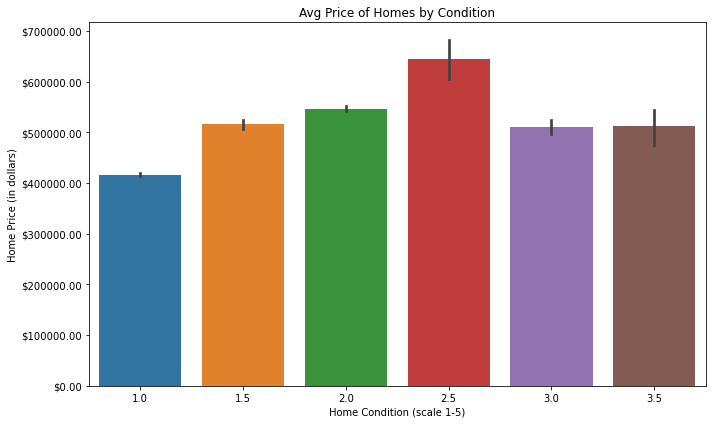

In [242]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='floors', 
            y='price', 
            data=df_clean)
ax.set_xlabel('Home Condition (scale 1-5)')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by floors')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig

plt.show()

Increase number of floors by increases the price of  by 10,000 dollars

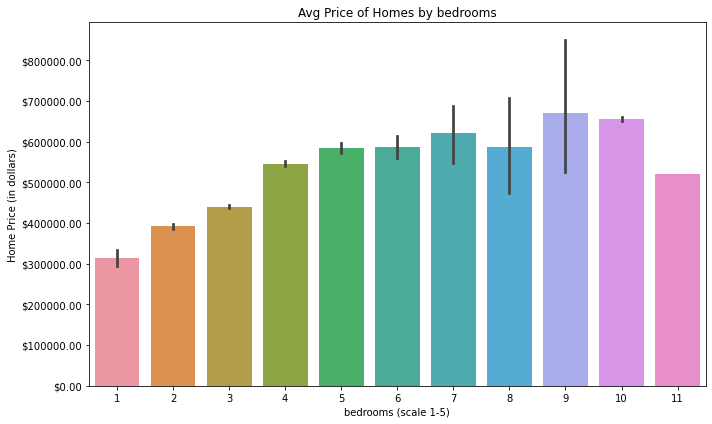

In [245]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='bedrooms', 
            y='price', 
            data=df_clean)
ax.set_xlabel('bedrooms (scale 1-5)')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by bedrooms')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig

plt.show()

Increase number of bedrooms in house leads to increase  pice of house bby 30000 dollars.

Reccomendation

In our final model comprising all features,our model performance based on the R squared improved from 49% to 56%.

Our Model Absolute Error improved which is reduced from the base model to 119321 whichh is good.

In our final model, all feature hhave signicantly linear relationship with sale price.

With holding variable constant, the addition of bathroom increase sale by 30000 dollars .

With holding variabble constant,the addition of floor is projected increase sale by 10000 dollars



limitation: Our model only explains 
47 percent of the variation in sale price, so we ought to be cautious with our predictions and conclusions. Further, our final model does have high levels of heteroscedasticity, which violates one of the assumptions of linear regression, such that our conclusions may be premature without additional manipulation of the data.

Next Steps:

Collect more recent sales data for more accurate representation of the market
Investigate influence of zipcode on sale price